In [43]:
import dataset
import began
import torch
from torch.utils import data
import torch.optim as optim
from PIL import Image
import numpy as np
from torchvision.transforms import ToPILImage
from IPython.core.display import display
import math

device = torch.device('cuda:0')
params = {
    'batch_size': 16,
    'shuffle': True, 
    'num_workers': 4,
}
epochs = 300
learning_rate = .0001
img_size = 128
channels = 128
kernel_size = 3
gamma = 0.5
lmbda = 0.01
dropout = 0.0
lr_decay = 0.9
g_dropout = 0.5
d_dropout = 0.0
# model = began.BEGAN(img_size, channels, kernel_size, gamma, lmbda, d_dropout, g_dropout)

print("Number of trainable parameters: ")
print(sum([param.nelement() for param in model.discriminator.parameters()]))

# discrim_optimizer = optim.Adam(model.discriminator.parameters(), lr=learning_rate)
# gen_optimizer = optim.Adam(model.generator.parameters(), lr=learning_rate)
# model.set_optimizers(discrim_optimizer, gen_optimizer)

training_set = dataset.PictureDataset(img_size, 'data/', '.jpg')
training_generator = data.DataLoader(training_set, **params)

global_step = 45018
num_images = training_generator.dataset.__len__()
batches = math.ceil(num_images/training_generator.batch_size)
batches = torch.tensor(batches).float().to(device)

# conv_values = []

for epoch in range(121, epochs):
    total_conv_measure = torch.tensor(0.0).to(device)
    total_d_reconstr_loss = torch.tensor(0.0).to(device)
    total_g_reconstr_loss = torch.tensor(0.0).to(device)
    
    for batch_images in training_generator:
        batch_images = batch_images.to(device)

        model.train_batch(batch_images)
        global_step += 1
        
        total_conv_measure += model.batch_conv_measure
        total_d_reconstr_loss += model.batch_d_reconstr_loss
        total_g_reconstr_loss += model.batch_g_reconstr_loss
                
    print('%d[Epoch: %d][Conv: %1.4f][d_recon_loss: %1.4f][g_recon_loss: %1.4f][k: %f]' 
        % (
            global_step, 
            epoch, 
            total_conv_measure/batches, 
            total_d_reconstr_loss/batches, 
            total_g_reconstr_loss/batches, 
            model.k,
        ))
    conv_values.append((total_conv_measure/batches).item())

    # Learning rate decay
    if epoch % 4 == 0:
        learning_rate = learning_rate*lr_decay
        discrim_optimizer = optim.Adam(model.discriminator.parameters(), lr=learning_rate)
        gen_optimizer = optim.Adam(model.generator.parameters(), lr=learning_rate)
        model.set_optimizers(discrim_optimizer, gen_optimizer)
    
    if epoch % 1 == 0:
        noise = torch.rand(1, 3, img_size, img_size).to(device)
        fake_img = model.generator(noise)
        image = ToPILImage()(fake_img[0].detach().cpu())
#         print('Generated fake img')
#         display(image)
        image.save('outputs/generated-img%s.png' % str(epoch))

        r_fake = model.discriminator(fake_img)
        r_fake_image = ToPILImage()(r_fake[0].detach().cpu())
#         print('Reconstructed fake img')
#         display(r_fake_image)

        reconstr_real = model.discriminator(batch_images[0].unsqueeze(0))[0].detach().cpu()
        rr_image = ToPILImage()(reconstr_real)
#         print('Reconstructed real image')
#         display(rr_image)
        rr_image.save('reconstructed-real/recon-real%s.png' % str(epoch))


Number of trainable parameters: 
18796483


/home/thldocker/miniconda/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:177: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.")
/home/thldocker/miniconda/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


45387[Epoch: 121][Conv: 0.1080][d_recon_loss: 0.1049][g_recon_loss: 0.0526][k: 0.000502]
45756[Epoch: 122][Conv: 0.1081][d_recon_loss: 0.1048][g_recon_loss: 0.0525][k: 0.000092]
46125[Epoch: 123][Conv: 0.1079][d_recon_loss: 0.1047][g_recon_loss: 0.0522][k: 0.000873]
46494[Epoch: 124][Conv: 0.1077][d_recon_loss: 0.1047][g_recon_loss: 0.0517][k: 0.003246]
46863[Epoch: 125][Conv: 0.1416][d_recon_loss: 0.1299][g_recon_loss: 0.0716][k: 0.000000]
47232[Epoch: 126][Conv: 0.1301][d_recon_loss: 0.1240][g_recon_loss: 0.0612][k: 0.003141]
47601[Epoch: 127][Conv: 0.1276][d_recon_loss: 0.1227][g_recon_loss: 0.0622][k: 0.000158]
47970[Epoch: 128][Conv: 0.1274][d_recon_loss: 0.1221][g_recon_loss: 0.0603][k: 0.004147]
48339[Epoch: 129][Conv: 0.1323][d_recon_loss: 0.1236][g_recon_loss: 0.0621][k: 0.004992]
48708[Epoch: 130][Conv: 0.1249][d_recon_loss: 0.1193][g_recon_loss: 0.0605][k: 0.002101]
49077[Epoch: 131][Conv: 0.1252][d_recon_loss: 0.1187][g_recon_loss: 0.0598][k: 0.000533]
49446[Epoch: 132][Con

Process Process-1076:
Process Process-1073:
Process Process-1075:
Process Process-1074:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/thldocker/miniconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/thldocker/miniconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/thldocker/miniconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/thldocker/miniconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/thldocker/miniconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/thldocker/miniconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/thldocker/minico

KeyboardInterrupt: 

In [40]:
def show(image):
    pil_image = ToPILImage()(image.cpu().detach()[0])
    display(pil_image)

/home/thldocker/miniconda/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:177: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.")
/home/thldocker/miniconda/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


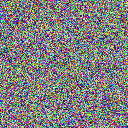

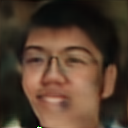

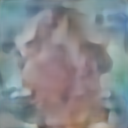

In [70]:
noise = (torch.rand(1, 3, 128, 128)).to(device)
fake = model.generator(noise)
r_noise = model.discriminator(noise)
show(noise)
show(fake)
show(r_noise)


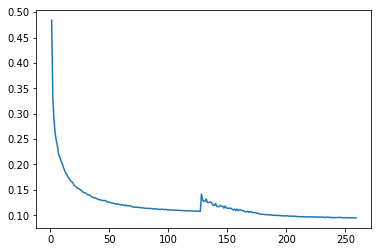

In [80]:
import matplotlib.pyplot as plt
plt.plot([x for x in range(1, 260)], conv_values)

In [85]:
torch.save(model.generator.state_dict(), 'saved_model/generator_weights')